# 1. Introduction
## 1.1 Background

在我国电子商务飞快发展的背景下，基本上所有的电子商务网站都支持消费者对产品的相关内容（商品、服务、卖家）等进行打分和发表评论。客户可以通过网络进行沟通和交流，在网络平台上发布大量的留言和评论，这已经成为互联网的一种流行形式，而这种形势必然给互联网带来海量的信息。

对于**卖家**来说，可以从评论信息中获取客户的实际需求，以改善产品品质，提高自身的竞争力。对于**客户**来说，可以借鉴别人的购买历史以及评论信息，更好的辅助自己制定购买决策。此外，对于一些未知体验产品，客户可以通过网络来获取产品信息，特别是对一些未知的体验产品，客户为了降低自身的风险更加倾向于得到其他客户的意见和看法，这些评论对潜在的买家而言无疑是一笔财富，并以此作为决策的重要依据。 因此，通过利用数据挖掘技术针对客户的大量评论进行分析，可以挖掘出这些信息的特征，而得到的这些信息有利于生产商改进自身产品和改善相关的服务，提高商家的核心竞争力。本项目所选择的Multi-Domain Sentiment Dataset 数据库包含从 Amazon.com 获取的来自许多产品类型（域）的产品评论，希望通过借助该数据库实现NLP语言处理技术在对商品评论进行情感分析，了解文本情感分类的基本用法。

# 2. Datasets
## 2.1 数据集的准备与介绍

1. Unzip

In [ ]:
# !tar zxvf data/data103817/processed_acl.tar.gz -C Multi-Domain

processed_acl/
processed_acl/dvd/
processed_acl/dvd/negative.review
processed_acl/dvd/unlabeled.review
processed_acl/dvd/positive.review
processed_acl/books/
processed_acl/books/negative.review
processed_acl/books/unlabeled.review
processed_acl/books/positive.review
processed_acl/kitchen/
processed_acl/kitchen/negative.review
processed_acl/kitchen/unlabeled.review
processed_acl/kitchen/positive.review
processed_acl/electronics/
processed_acl/electronics/negative.review
processed_acl/electronics/unlabeled.review
processed_acl/electronics/positive.review


2. 查看数据集的目录结构

Multi-Domain Sentiment Dataset 包含从 Amazon.com 获取的来自许多产品类型（域）的产品评论。某些域（书籍和 DVD）有数十万条评论。其他（乐器）只有几百。评论包含星级评分（1 到 5 星），如果需要，可以将其转换为二进制标签。此页面包含有关数据的一些说明。

关于数据集的一些注意事项:
1. unprocessed 文件夹包含原始数据。
2. processed.acl 文件夹包含预处理和平衡的数据。也就是说，Blitzer 等人的格式。(ACL 2007)
3. processed.realvalued 包含了经过预处理和平衡的数据，但是有星数，而不仅仅是正数或负数。也就是说，Mansour 等人的格式。(NIPS 2009)

    预处理数据为每个文档一行，每行格式如下：
    
    feature:<count> .... feature:<count> #label#:<label>
  
    标签总是在每个文件的末尾线。
4. 每个目录对应一个域。每个目录包含几个文件，我们简要介绍一下：
    - all.review -- 该域的所有评论，以其原始格式
    - positive.review -- 正面评论
    - negative.review -- 负面评论
    - unlabeled.review -- 未标记的评论
    - processed.review -- 预处理评论（见下文）
    - processing.review.balanced -- 预处理评论，在正面和负面之间均衡。

5. 虽然正面和负面文件包含正面和负面评论，但这些不一定是任何引用论文中使用的分割。他们只是在那里尽可能地进行初始分裂。
6. 每个（未处理的）文件都包含一个用于对评论进行编码的伪 XML 方案。大多数字段都是不言自明的。评论有一个不是很独特的唯一 ID 字段。如果它有两个唯一的 id 字段，则忽略仅包含一个数字的那个。总有一些我们可能忽略的小细节。如果您在阅读论文和本页后有任何疑问，请告诉 Mark Dredze 或 John Blitzer。

In [ ]:
!tree Multi-Domain 

Multi-Domain
├── processed_acl
│   ├── books
│   │   ├── negative.review
│   │   ├── positive.review
│   │   └── unlabeled.review
│   ├── dvd
│   │   ├── negative.review
│   │   ├── positive.review
│   │   └── unlabeled.review
│   ├── electronics
│   │   ├── negative.review
│   │   ├── positive.review
│   │   └── unlabeled.review
│   └── kitchen
│       ├── negative.review
│       ├── positive.review
│       └── unlabeled.review
├── processed_stars
│   ├── books
│   │   ├── all_balanced.review
│   │   ├── test
│   │   └── train
│   ├── dvd
│   │   ├── all_balanced.review
│   │   ├── test
│   │   └── train
│   ├── electronics
│   │   ├── all_balanced.review
│   │   ├── test
│   │   └── train
│   └── kitchen
│       ├── all_balanced.review
│       ├── test
│       └── train
└── sorted_data
    ├── apparel
    │   ├── all.review
    │   ├── negative.review
    │   ├── positive.review
    │   ├── processed.review
    │   ├── processed.review.balanced
    │   └── unlabeled.review
    ├── au

考虑到数据集数据量较大，此处我们进选择其中的一小部分：`processed_stars/electronics` 文件夹中的数据作为本项目的数据进行分析。

## 2.2 文本数据的统计分析
### 2.2.1 读取数据

- 定义路径和读取函数

In [ ]:
data_path = 'Multi-Domain/sorted_data/books/'
all_path = data_path + 'all.review'
positive_path = data_path + 'positive.review'
negative_path = data_path + 'negative.review'
unbalance_path = data_path + 'unbalanced.review'
test_path = data_path + 'processed.review.balanced'
processed_path = data_path + 'processed.review'


def read_dataset(dataset_path):
    # ========== 可以通过下述代码查看 txt 文件的编码
    # import chardet
    # f = open(positive_path,'rb')
    # data = f.read()
    # print(chardet.detect(data))
    # =============================================

    with open(dataset_path, encoding = 'ISO-8859-1') as f:
        train = f.readlines()
    
    # 进行简单的筛选，将小于 15 个单词的句子进行剔除
    train = [i for i in train if not i.startswith('<')]
    train = [i for i in train if len(i.split(' ')) >= 15]

    return train

- 加载数据 

    通过初步查看，发现数据集中有许多无效的评论，因此此处进行了简单筛选，剔除小于 `15` 个单词的评论，为了便利，此项目进队 `positve` 和 `negative` 进行识别和分析。

In [ ]:
positive_dataset = read_dataset(positive_path)
negative_dataset = read_dataset(negative_path)

print('The length of Positive dataset: ', len(positive_dataset))
print('The length of Negative dataset: ', len(negative_dataset))

The length of Positive dataset:  2224
The length of Negative dataset:  2428


可以发现，得到了 `2224` 条积极评论，`2428` 条负向评论。

### 2.2.2 文本处理方法

由于本项目所选数据为英语，因此选用 `NLTK` 库来处理我们的英语文本数据，而在借助 `NLTK` 处理句子时，需要加载其自定义的 `tokenizer`，由于无法直接下载，此处我们选择将 `punkt.zip` 上传至 `/home/aistudio/nltk_data/tokenizers/` 文件路径，以保证 `NLTK` 可以正常处理数据。该压缩包可以通过网上查找得到。

In [ ]:
import nltk
import string
import numpy as numpy
from collections import Counter
from nltk.tokenize import sent_tokenize

- 将文本切分为语句

In [ ]:
test_text = train_dataset[0] 

from nltk.tokenize import sent_tokenize
sent_tokenize(test_text)

["Bridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them."]

- 词干统计

In [ ]:
def stem_count(text):
    text = text.lower()
    punctuation_map = dict((ord(char), None) for char in string.punctuation)
    remove_punct = text.translate(punctuation_map)
    #tokens = nltk.word_tokenize(remove_punct)
    tokens = remove_punct.split()
    #print(tokens)
    #remove_stopwords = [w for w in tokens if not w in stopwords.words('english')]
    #print(remove_stopwords)
    s = nltk.stem.SnowballStemmer('english')
    clean_text = [s.stem(ws) for ws in tokens]
    count = Counter(clean_text)
    return count

stem_count(test_text)

Counter({'bridget': 1,
         'jone': 1,
         'modern': 1,
         'day': 1,
         'woman': 1,
         'brillant': 1,
         'and': 2,
         'doesnt': 1,
         'know': 1,
         'it': 1,
         'prone': 1,
         'to': 2,
         'accid': 1,
         'mess': 1,
         'up': 1,
         'but': 1,
         'manag': 1,
         'come': 1,
         'out': 1,
         'of': 1,
         'them': 1})


- 分词

In [ ]:
nltk.word_tokenize(test_text)

['Bridget',
 'Jones',
 ',',
 'modern',
 'day',
 'woman',
 ',',
 'brillant',
 'and',
 'does',
 "n't",
 'know',
 'it',
 ',',
 'prone',
 'to',
 'accidents',
 'and',
 'mess',
 'ups',
 'but',
 'manages',
 'to',
 'come',
 'out',
 'of',
 'them',
 '.']

- 词频统计

In [ ]:
import string 

test_words = ' '.join(positive_dataset)
words = nltk.word_tokenize(test_words)

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
words = [i for i in words if i not in string.punctuation]

word_counters = Counter(words)
word_counters.most_common(50)

[('the', 7257),
 ('and', 4677),
 ('of', 4653),
 ('to', 3994),
 ('a', 3706),
 ('is', 2645),
 ('in', 2402),
 ('I', 2262),
 ('book', 1872),
 ('that', 1649),
 ('this', 1530),
 ('it', 1474),
 ('for', 1351),
 ("'s", 1288),
 ('with', 1093),
 ('The', 1084),
 ('as', 1037),
 ('you', 928),
 ('was', 878),
 ('on', 829),
 ('are', 819),
 ('not', 762),
 ('have', 703),
 ('``', 702),
 ("''", 698),
 ('be', 663),
 ('his', 656),
 ('but', 631),
 ('This', 575),
 ('an', 567),
 ('read', 565),
 ('from', 561),
 ('by', 549),
 ('about', 518),
 ('one', 510),
 ('he', 504),
 ('who', 483),
 ('all', 478),
 ("n't", 477),
 ('my', 473),
 ('has', 470),
 ('or', 464),
 ('at', 461),
 ('It', 457),
 ('more', 423),
 ('what', 355),
 ('so', 354),
 ('her', 354),
 ('very', 347),
 ('can', 346)]

- 去除停用词

In [ ]:
# 下载停用词
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aistudio/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

test_words = ' '.join(positive_dataset)
words = nltk.word_tokenize(test_words)

stop_words = set(stopwords.words('english'))
words = [i for i in words if (i not in stop_words) and (i not in string.punctuation)]

word_counters = Counter(words)
word_counters.most_common(50)

[('I', 2262),
 ('book', 1872),
 ("'s", 1288),
 ('The', 1084),
 ('``', 702),
 ("''", 698),
 ('This', 575),
 ('read', 565),
 ('one', 510),
 ("n't", 477),
 ('It', 457),
 ('would', 310),
 ('like', 305),
 ('also', 276),
 ('story', 273),
 ('life', 267),
 ('great', 259),
 ('Books', 253),
 ('well', 253),
 ('quot', 250),
 ('good', 245),
 ('books', 240),
 ('time', 239),
 ('many', 238),
 ('people', 226),
 ('much', 224),
 ('In', 219),
 ('first', 213),
 ('A', 210),
 ('work', 188),
 ('reading', 188),
 ('really', 187),
 ('get', 185),
 ('If', 179),
 ('even', 179),
 ('way', 177),
 ('could', 176),
 ('--', 174),
 ('new', 166),
 ('years', 160),
 ('find', 158),
 ('best', 155),
 ('He', 150),
 ('make', 144),
 ('know', 143),
 ('written', 143),
 ('love', 140),
 ('think', 133),
 ('But', 133),
 ('world', 127)]

- 词云可视化

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 366 kB 4.8 MB/s            
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


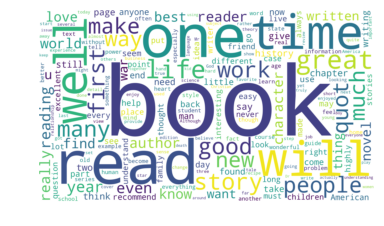

In [ ]:
from wordcloud import WordCloud 

results = {}

test_words = ' '.join(positive_dataset)

wordcloud = WordCloud(collocations = False, 
    background_color = 'white',
    width = 2800,
    height = 1600
    ).generate(test_words)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2.3 数据集类的定义

- 数据合并

    首先将 `positive` 和 `negative` 的样本打散，生成新的样本集。
    
    - `positive`: 1
    - `negative`: 0

In [ ]:
import os 
import pandas as pd 

export_path = 'Senti_dataset/'
all_data_path = export_path + 'all.csv'
# 把生成的数据列表都放在自己的总类别文件夹中

if os.path.exists(all_data_path):
    all_pd = pd.read_csv(all_data_path, encoding = 'utf-8', index_col = 0)
else:
    pos_pd = pd.DataFrame(positive_dataset, columns = ['Sentences'])
    pos_pd['Label'] = 1 # Positive

    neg_pd = pd.DataFrame(negative_dataset, columns = ['Sentences'])
    neg_pd['Label'] = 0

    all_pd = pd.concat([pos_pd, neg_pd], axis = 0)
    all_pd = all_pd.sample(frac=1).reset_index(drop=True) # 打散数据
    all_pd.to_csv(data_path, encoding = 'utf-8')

- 构建数据字典

In [ ]:
def create_dic(df, dict_path):
    with open(dict_path, 'w') as f:
        f.seek(0)
        f.truncate()

    dict_set = set()
    
    contents = ' '.join(df['Sentences'].to_list())

    tokens = nltk.word_tokenize(contents)
    s = nltk.stem.SnowballStemmer('english')
    clean_text = [s.stem(ws) for ws in tokens]

    for s in clean_text:
        dict_set.add(s)

    dict_list = []
    i = 0
    for s in dict_set:
        dict_list.append([s, i])
        i += 1
    
    dict_txt = dict(dict_list)
    end_dict = {'<unk>': i, '<pad>': i+1}
    dict_txt.update(end_dict)

    with open(dict_path, 'w', encoding='utf-8') as f:
        f.write(str(dict_txt))
    
    print('The word dictionary has been created successfully!')

# dict_path = export_path + 'word2idx.txt'
# create_dic(all_pd, dict_path)

- 加载单词表

In [ ]:
import os

def load_vocab(dict_path):
    if os.path.exists(dict_path) == False:
        create_dic(all_pd, dict_path)

    with open(dict_path, 'r', encoding = 'utf-8') as fr:
        vocab = eval(fr.read())
    
    return vocab

# vocab = load_vocab(dict_path)

- 创建序列化的数据，并按照一定比例划分训练数据集与验证数据集

In [ ]:
def f_write_txt(sentences, word2idx, label):
    labs = ""
    ste = nltk.stem.SnowballStemmer('english')
    sentences = sentences.split(' ')
    for s in sentences:
        word = ste.stem(s)
        lab = str(word2idx.get(word, word2idx['<unk>']))
        # if word in word2idx.keys():
        #     lab = str(word2idx[word])
        # else:
        #     lab = str(word2idx['<unk>'])
        labs = labs + lab + ','
    labs = labs[:-1]
    labs = labs + '\t' + label + '\n'

    return labs 

def create_data_list(df, train_path, test_path, dict_path):
    dict_txt = load_vocab(dict_path)

    i = 0
    maxlen = 0
    with open(test_path, 'a', encoding='utf-8') as f_eval,open(train_path, 'a', encoding='utf-8') as f_train:
        for i, sentence in enumerate(df['Sentences'].values):
            label = str(df.loc[i, 'Label'])
            maxlen = max(maxlen, len(sentence.split(' ')))
            labs = f_write_txt(sentence, dict_txt, label)
            # 每8个 抽取一个数据用于验证
            if i % 8 == 0:
                f_eval.write(labs)
            else:
                f_train.write(labs)
    print("数据列表生成完成！")
    print(maxlen)


In [ ]:

# 把生成的数据列表都放在自己的总类别文件夹中
train_path = export_path + 'train_list.txt'
test_path = export_path + 'eval_list.txt'
dict_path = export_path + 'word2idx.txt'

#在生成数据之前，首先将eval_list.txt和train_list.txt清空
with open(test_path, 'w', encoding='utf-8') as f_eval:
    f_eval.seek(0)
    f_eval.truncate()
with open(train_path, 'w', encoding='utf-8') as f_train:
    f_train.seek(0)
    f_train.truncate() 

create_data_list(all_pd, train_path, test_path, dict_path)

数据列表生成完成！
877


- 打印前两条信息

In [ ]:
word2id = load_vocab(dict_path)

def ids_to_str(ids):
    words = []
    for k in ids:
        w = list(vocab.keys())[list(vocab.values()).index(int(k))]
        words.append(w if isinstance(w, str) else w.decode('ASCII'))
    return " ".join(words)

with open (test_path, 'r', encoding = 'utf-8') as f:
    i = 0
    lines = f.readlines()
    for line in lines:
        i += 1
        cols = line.strip().split("\t")
        if len(cols) != 2:
            sys.stderr.write("[NOTICE] Error Format Line!")
            continue
        
        label = int(cols[1])
        sentence = cols[0].split(',')
        print(str(i) + ":")
        print('sentence list id is:', sentence)
        print('sentence list is: ', ids_to_str(sentence))
        print('sentence label id is:', label)
        print('---------------------------------')
            
        if i == 2: break

1:
sentence list id is: ['15218', '3300', '1146', '3692', '11365', '8848', '15857', '554', '1040', '17305', '17228', '15857', '1146', '14705', '16177', '17305']
sentence list is:  this is a hastili compil collect of lectur note <unk> summari of a ph.d. student <unk>
sentence label id is: 0
---------------------------------
2:
sentence list id is: ['1531', '7867', '8016', '17305', '12755', '2271', '1698', '5271', '1531', '8112', '16252', '17305', '17305', '17305', '966', '17305']
sentence list is:  the global women <unk> issu and strategi for the new centuri <unk> <unk> <unk> peggi <unk>
sentence label id is: 1
---------------------------------


- 定义数据集

In [ ]:
import paddle 
import numpy as np

from paddle.io import Dataset, DataLoader
from paddlenlp.datasets import MapDataset 

class MyDataset(Dataset):
    def __init__(self, dataset_path, vocab):
        self.dataset_path = dataset_path 
        self.vocab = vocab
        self.all_data = []

        with open (dataset_path, 'r', encoding = 'utf-8') as f:
            i = 0
            lines = f.readlines()
            for line in lines:
                i += 1
                cols = line.strip().split("\t")
                if len(cols) != 2:
                    sys.stderr.write("[NOTICE] Error Format Line!")
                    continue
                
                label = int(cols[1])
                sentence = cols[0].split(',')

                if len(sentence) >= 150:
                    sentence = np.array(sentence[:150]).astype('int64')   
                else:
                    sentence = np.concatenate([sentence, [vocab["<pad>"]]*(150-len(sentence))]).astype('int64')
                label = np.array(label)
                labels = np.array([0, 0]).astype('int64')
                labels[label] = 1
                self.all_data.append((sentence, labels))

    def __getitem__(self, idx):
        data, labels = self.all_data[idx]
        return data, labels

    def __len__(self):
        return len(self.all_data)

vocab = load_vocab(dict_path)
batch_size = 32
train_dataset = MyDataset(train_path, vocab)
test_dataset = MyDataset(test_path, vocab)

train_loader = DataLoader(train_dataset, places=paddle.CPUPlace(), return_list=True,
                                    shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_dataset, places=paddle.CPUPlace(), return_list=True,
                                    shuffle=True, batch_size=batch_size, drop_last=True)

## 2.4 数据集的测试

In [ ]:
def ids_to_str(ids):
    words = []
    for k in ids:
        w = list(vocab.keys())[list(vocab.values()).index(int(k))]
        words.append(w if isinstance(w, str) else w.decode('ASCII'))
    return " ".join(words)

dict_sent = {1: 'Positive', 0: 'Negative'}

print('=============train_dataset =============') 
for data, label in train_dataset:
    print('Sentence list: ', data)
    print('Sentence (stem): ', ids_to_str(data))
    print('Shape: ', np.array(data).shape)
    print('Label: ', dict_sent[np.where(label==np.max(label))[0].item()])
    break


print('=============test_dataset =============') 
for data, label in test_dataset:
    print('Sentence list: ', data)
    print('Sentence (stem): ', ids_to_str(data))
    print('Shape: ', np.array(data).shape)
    print('Label: ', dict_sent[np.where(label==np.max(label))[0].item()])
    break

=============train_dataset =============
Sentence list:  [14526 14200 15218  2216  5271  1531  8453 17305 14526 11612  1531  5163
  7502  1531  6595  6058  8805 12213  7056  6708  9341    41 17204 14200
 16770  1505 13905  8156  4789 15857  1531  3659 15857  1531 17305  1531
  8166  5502 15435  1330 17305  1977 14043  1531 15115 17305 17305  8875
 17204  1146 15705  4789 15857  1531  1927 16190 14043  5706 17305  2271
   323 15534  5271  7717  3880 14043  6416 17305  3300  1531 14332 11875
 11029  5271  1531  7554  3592  8294 10899  6675 15857  1146 11118 13967
  6727 17305 14526  2983  6059  9341 15218  2216 13579   323  3948 17305
 14526 17180  1531 12758  2216 14043  1531 17305 17306 17306 17306 17306
 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306
 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306
 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306 17306
 17306 17306 17306 17306 17306 17306]
Sentence (stem):  i enjoy thi

# 3. Model

本项目选择使用卷积神经网络来处理我们的文本数据。

## 3.1 Configuration

- 导入包

In [ ]:
from paddle import nn, optimizer, metric
import paddle.nn.functional as F


- 定义超参数

In [ ]:
export_path = 'Senti_dataset/'
all_data_path = export_path + 'all.csv'
# 把生成的数据列表都放在自己的总类别文件夹中
train_path = export_path + 'train_list.txt'
test_path = export_path + 'eval_list.txt'
dict_path = export_path + 'word2idx.txt'

EMBEDDING_DIM = 128
N_FILTER = 100
FILTER_SIZE = 3
CLASS_DIM = 2
NUM_CHANNELS = 1
BATCH_SIZE = 32
SEQ_LEN = 150
LEARNING_RATE = 0.002

- 定义模型

In [ ]:
class CNN(nn.Layer):
    def __init__(self, vocab, embedding_dim, n_filter, class_dim, 
                filter_size, num_channels, batch_size, seq_len):
        super(CNN, self).__init__()
        self.vocab_size = len(vocab)
        self.padding_idx = vocab['<unk>']
        self.embedding_dim = embedding_dim
        self.n_filter = n_filter
        self.class_dim = class_dim
        self.num_channels = num_channels
        self.filter_size = filter_size
        self.batch_size = batch_size
        self.seq_len = seq_len

        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim, 
                        sparse=False, padding_idx = self.padding_idx)
        self.conv = nn.Conv2D(in_channels=1,                        #通道数
                        out_channels=self.n_filter,                 #卷积核个数
                        kernel_size= [self.filter_size, self.embedding_dim],  #卷积核大小
                        padding=[1, 1]
                        )      
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2D(kernel_size = 2, stride = 2)
        self.fc = nn.Linear(int(self.n_filter*self.seq_len/2), 2)

    def forward(self, text):
        
        #print('输入维度：', input.shape)
        x = self.embedding(text)
        x_shape = [self.batch_size, self.num_channels, self.seq_len, self.embedding_dim]
        x = paddle.reshape(x, x_shape)   # [32, 1, 150, 128]
        x = self.relu(self.conv(x))
        #print('第一层卷积输出维度：', x.shape)
        x = self.maxpool(x)
        #print('池化后输出维度：', x.shape)
        #在输入全连接层时，需将特征图拉平会自动将数据拉平.

        x = paddle.reshape(x, shape=[self.batch_size, -1])
        out = self.fc(x)
        return out                 

In [ ]:
vocab = load_vocab(dict_path)
model = CNN(vocab, EMBEDDING_DIM, N_FILTER, CLASS_DIM, FILTER_SIZE, NUM_CHANNELS, BATCH_SIZE, SEQ_LEN)

- 计算参数量

In [ ]:
model.parameters()[0].numel().item()

2215296

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.stop_gradient==False).item()

print(f'The model has {count_parameters(model):,} trainable parameters')
# print(f'The model has {} trainable parameters'.format(count_parameters(model)))

The model has 2,268,798 trainable parameters


## 3.2 Model training

In [ ]:
predictions.shape

[2, 5]

In [ ]:
predictions = paddle.to_tensor([[0.2, 0.1, 0.4, 0.1, 0.1], [0.2, 0.3, 0.1, 0.15, 0.25]], dtype='float32')
label = paddle.to_tensor([[2], [0]], dtype="int64")
result = paddle.metric.accuracy(input=predictions, label=label, k=1)
result

Tensor(shape=[1], dtype=float32, place=CPUPlace, stop_gradient=True,
       [0.50000000])

In [161]:
import matplotlib.pyplot as plt

def draw_process(title,color,iters,data,label):
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.plot(iters, data,color=color,label=label) 
    plt.legend()
    plt.grid()
    plt.show()

def train(model, model_save_path):
    model.train()
    opt = optimizer.Adam(learning_rate=LEARNING_RATE, parameters=model.parameters())
    steps = 0
    Iters, total_loss, total_acc = [], [], []
    for epoch in range(3):
        for batch_id, data in enumerate(train_loader):
            steps += 1
            sent = data[0]
            label = data[1].astype('float32')
            logits = model(sent)
            loss = F.cross_entropy(logits, label, soft_label = True)

            real = paddle.argmax(label, axis = 1).unsqueeze(axis = 1)
            acc = metric.accuracy(logits, real)
            if batch_id % 50 == 0:
                Iters.append(steps)
                total_loss.append(loss.numpy()[0])
                total_acc.append(acc.numpy()[0])
                print("epoch: {}, batch_id: {}, loss is: {}".format(epoch, batch_id, loss.numpy()))
            
            loss.backward()
            opt.step()
            opt.clear_grad()

        # evaluate model after one epoch
        model.eval()
        accuracies = []
        losses = []
        for batch_id, data in enumerate(test_loader):
            sent = data[0]
            label = data[1].astype('float32')
            logits = model(sent)
            loss = F.cross_entropy(logits, label, soft_label = True)
            
            real = paddle.argmax(label, axis = 1).unsqueeze(axis = 1)
            acc = metric.accuracy(logits, real)
            accuracies.append(acc.numpy())
            losses.append(loss.numpy())
        
        avg_acc, avg_loss = np.mean(accuracies), np.mean(losses)
        print("[validation] accuracy: {}, loss: {}".format(avg_acc, avg_loss))
        model.train()

    paddle.save(model.state_dict(),model_save_path)
    return Iters, total_loss, total_acc

model_save_path = export_path + 'model_final.bin'       
model = CNN(vocab, EMBEDDING_DIM, N_FILTER, CLASS_DIM, FILTER_SIZE, NUM_CHANNELS, BATCH_SIZE, SEQ_LEN)

iters, total_loss, total_acc = train(model, model_save_path)

epoch: 0, batch_id: 0, loss is: [0.69147956]
epoch: 0, batch_id: 50, loss is: [0.74618393]
epoch: 0, batch_id: 100, loss is: [0.7883642]
[validation] accuracy: 0.6684027910232544, loss: 0.5995304584503174
epoch: 1, batch_id: 0, loss is: [0.33007044]
epoch: 1, batch_id: 50, loss is: [0.34302858]
epoch: 1, batch_id: 100, loss is: [0.30803037]
[validation] accuracy: 0.7118055820465088, loss: 0.5608886480331421
epoch: 2, batch_id: 0, loss is: [0.08655567]
epoch: 2, batch_id: 50, loss is: [0.08403747]
epoch: 2, batch_id: 100, loss is: [0.05325777]
[validation] accuracy: 0.6805555820465088, loss: 0.7883006930351257


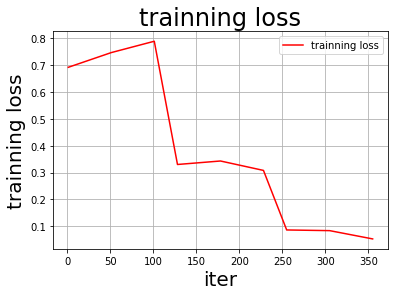

In [162]:
draw_process("trainning loss","red",iters,total_loss,"trainning loss")

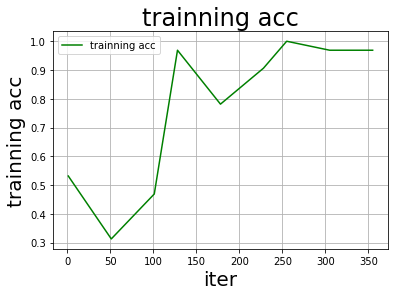

In [163]:
draw_process("trainning acc","green",iters,total_acc,"trainning acc")

## 3.3 Model evaluation

In [166]:
model_state_dict = paddle.load(model_save_path)
model = CNN(vocab, EMBEDDING_DIM, N_FILTER, CLASS_DIM, FILTER_SIZE, NUM_CHANNELS, BATCH_SIZE, SEQ_LEN)

model.set_state_dict(model_state_dict) 
model.eval()
accuracies = []
losses = []

for batch_id, data in enumerate(test_loader):
    
    sent = data[0]
    label = data[1].astype('float32')
    logits = model(sent)
    loss = F.cross_entropy(logits, label, soft_label = True)
    
    real = paddle.argmax(label, axis = 1).unsqueeze(axis = 1)
    acc = metric.accuracy(logits, real)
    
    accuracies.append(acc.numpy())
    losses.append(loss.numpy())

avg_acc, avg_loss = np.mean(accuracies), np.mean(losses)
print("[validation] accuracy: {}, loss: {}".format(avg_acc, avg_loss))


[validation] accuracy: 0.6822916865348816, loss: 0.7864543199539185


## 3.4 Prediction

接下来用测试集的数据对训练好的模型进行预测

In [174]:
dict_sent = {1: 'Positive', 0: 'Negative'}

for batch_id, data in enumerate(test_loader):
    
    sent = data[0]
    gt_labels = data[1].numpy()
    results = model(sent)

    predictions = []
    for probs in results:
        # 映射分类label
        idx = np.argmax(probs)
        labels = dict_sent[idx]
        predictions.append(labels)
    
    for i,pre in enumerate(predictions):
        print('数据: {} \n\n预测: {} \n原始标签：{}'.format(ids_to_str(sent[0]).replace("<pad>",""), pre, dict_sent[gt_labels[0][0]]))
        break
    break

数据: multipl review of other washington biographi recommend this abridg over the book they were <unk> <unk> i am a <unk> as claim <unk> but i have not read ani washington <unk> i still thought the <unk> abov inform might be help to other <unk>                                                                                                           

预测: Negative 
原始标签：Negative


**Conclusion**：可以发现模型的预测效果还行，至此，基于 `CNN` 模型的情感分类模型已经完成，虽然此处仅使用了我们数据集中的 `books-review` 数据，但模型的整体框架是完整的，可以在此基础上加入其他数据集进行模型训练，考虑到时间，此处便不再加入其他数据来验证模型。